## **EDA - Exploratory Data Analysis**

Nesse notebook, é feito a exploração dos dados por meio de boas práticas de EDA.

## Importações

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/students.csv', encoding='utf-8', index_col=False)

In [3]:
df.head()

,student_id,student_name,age,email,country,language_level,attendance_rate,homework_completion,test1_score,test2_score,test3_score,teacher_feedback
0,1,Zackariah Tayloe,20,ztayloe0@facebook.com,Dominican Republic,beginner,56.93,False,4.23,6.75,0.31,Vestibulum sed magna at nunc commodo placerat....
1,2,Hughie Beedle,51,hbeedle1@microsoft.com,Norway,intermediate,23.41,True,5.23,7.54,7.86,Maecenas rhoncus aliquam lacus. Morbi quis tor...
2,3,Godfree Flobert,30,gflobert2@hp.com,Philippines,intermediate,33.28,True,4.38,7.55,3.06,In hac habitasse platea dictumst. Etiam faucib...
3,4,Denis Trouel,20,dtrouel3@51.la,Uruguay,advanced,40.59,False,3.55,2.55,1.93,Integer ac neque. Duis bibendum. Morbi non qua...
4,5,Roselia Beadnell,20,rbeadnell4@nhs.uk,United States,intermediate,26.33,False,2.19,3.66,9.84,Vestibulum rutrum rutrum neque. Aenean auctor ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           1000 non-null   int64  
 1   student_name         1000 non-null   object 
 2   age                  1000 non-null   int64  
 3   email                1000 non-null   object 
 4   country              1000 non-null   object 
 5   language_level       1000 non-null   object 
 6   attendance_rate      1000 non-null   float64
 7   homework_completion  1000 non-null   bool   
 8   test1_score          1000 non-null   float64
 9   test2_score          1000 non-null   float64
 10  test3_score          1000 non-null   float64
 11  teacher_feedback     1000 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 87.0+ KB


In [5]:
# Atualização da coluna 'homework_completion' para melhor legibilidade:

df['homework_completion'] = df['homework_completion'].replace({False:'not completed', True:'completed'})

In [6]:
# Cria a coluna 'age_range' com o intervalo de idade

df['age_range'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
ordem = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']

In [7]:
# Cria a coluna 'final_grade', contendo a média da somatória das 3 notas

df['final_grade'] = (df['test1_score']+df['test2_score']+df['test3_score'])/3

In [8]:
# Cria a coluna 'classification' para classificar as notas em A, B, C

df['classification'] = pd.cut(df['final_grade'], bins=[0,  2, 4, 6, 8, 9, np.inf], labels=['F', 'E', 'D', 'C', 'B', 'A'], include_lowest=True)

In [9]:
# Separa os dados em qualitativos e quantitativos, removendo a coluna "student_id"

qualitative = [x for x in df.columns if df[x].dtype == 'object']
quantitative = df.select_dtypes(include=['number']).columns
quantitative = [x for x in quantitative if x != 'student_id']

print(f"Colunas Quantitativas:\n{quantitative}\n")
print(f"Colunas Qualitativas:\n{qualitative}")

Colunas Quantitativas:
['age', 'attendance_rate', 'test1_score', 'test2_score', 'test3_score', 'final_grade']

Colunas Qualitativas:
['student_name', 'email', 'country', 'language_level', 'homework_completion', 'teacher_feedback']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   student_id           1000 non-null   int64   
 1   student_name         1000 non-null   object  
 2   age                  1000 non-null   int64   
 3   email                1000 non-null   object  
 4   country              1000 non-null   object  
 5   language_level       1000 non-null   object  
 6   attendance_rate      1000 non-null   float64 
 7   homework_completion  1000 non-null   object  
 8   test1_score          1000 non-null   float64 
 9   test2_score          1000 non-null   float64 
 10  test3_score          1000 non-null   float64 
 11  teacher_feedback     1000 non-null   object  
 12  age_range            1000 non-null   category
 13  final_grade          1000 non-null   float64 
 14  classification       1000 non-null   category
dtypes: category(2), float6

## Distribuições

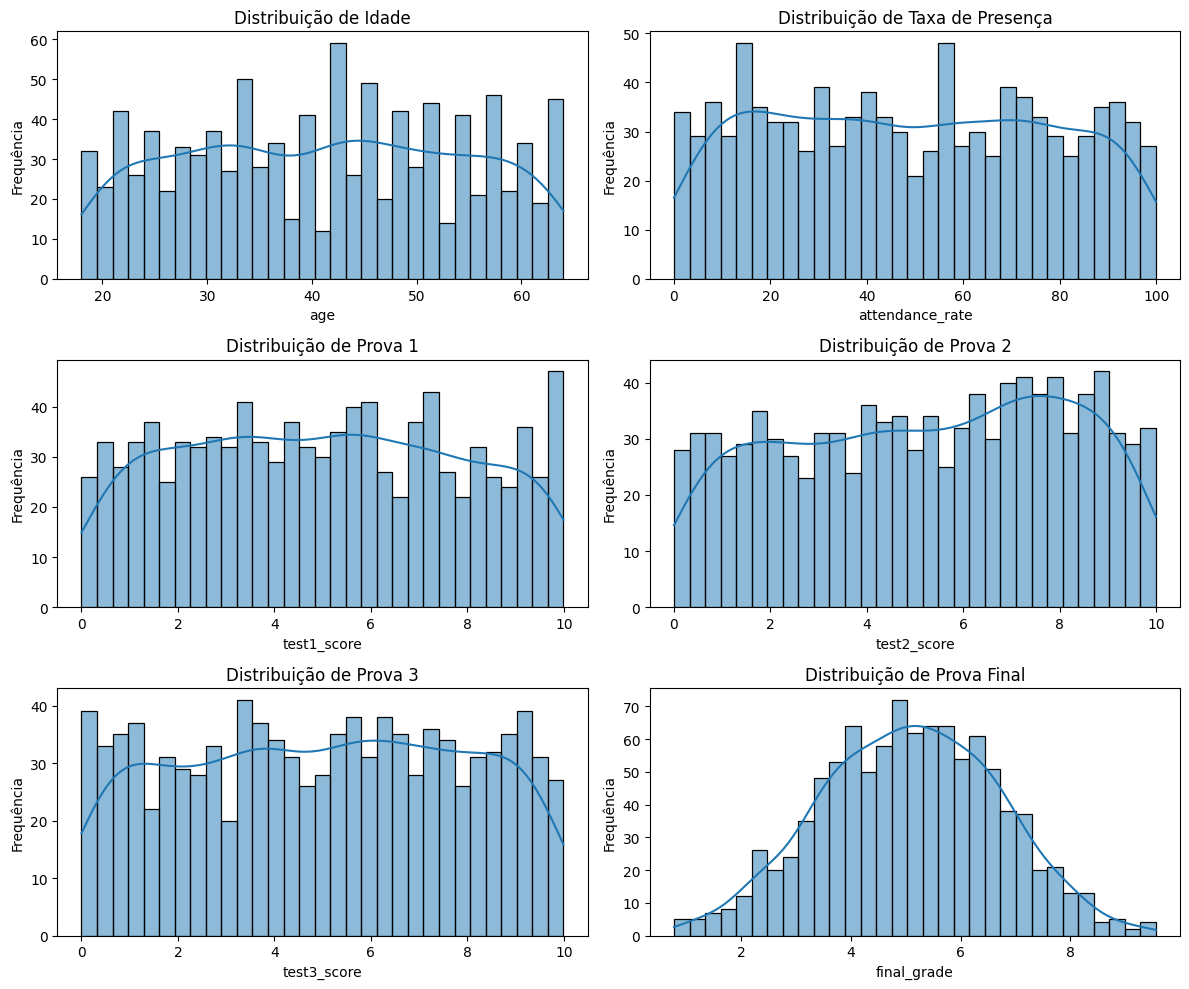

In [11]:
# Definição do layout e vetorização das posições

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  
axes = axes.flatten()

# Definição de bins pela raiz quadrada de N

n = df.shape[0]
bins = int(np.sqrt(n))

# Criação dos histogramas por colunas quantitativas.

sns.histplot(df['age'], bins=bins, kde=True, ax=axes[0])

sns.histplot(df['attendance_rate'], bins=bins, kde=True, ax=axes[1])

sns.histplot(df['test1_score'], bins=bins, kde=True, ax=axes[2])

sns.histplot(df['test2_score'], bins=bins, kde=True, ax=axes[3])

sns.histplot(df['test3_score'], bins=bins, kde=True, ax=axes[4])

sns.histplot(df['final_grade'], bins=bins, kde=True, ax=axes[5])

# Laço de Repetição para nomear os gráficos

for i, titulo in enumerate(['Idade', 'Taxa de Presença', 'Prova 1', 'Prova 2', 'Prova 3', 'Prova Final']):
    axes[i].set_title(f"Distribuição de {titulo}")
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.savefig('../fig/distribution.png')
plt.show()

# **Dados Qualitativos**

## Proporção

not completed: 50.90%
completed: 49.10%


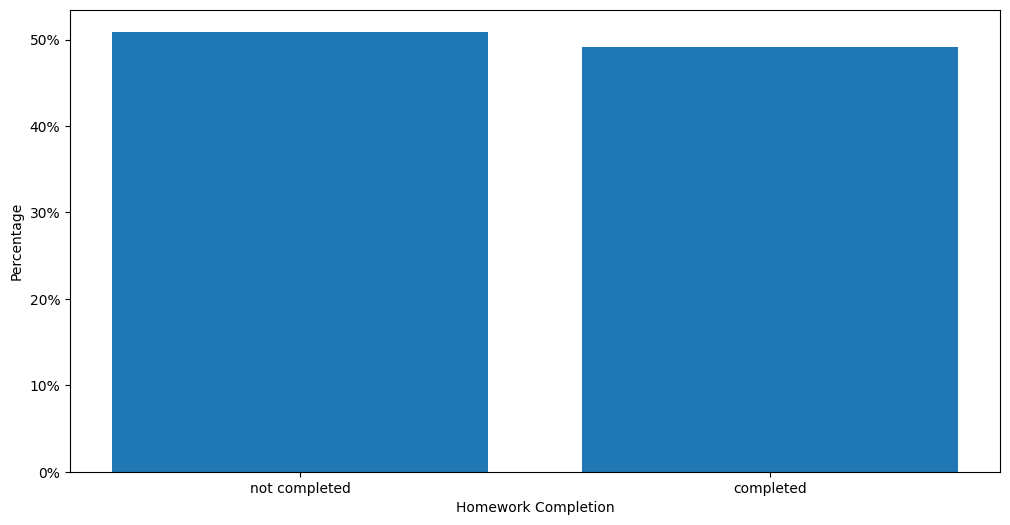

In [12]:
# Proporção de homework_completion

proportion_hwc = df['homework_completion'].value_counts(normalize=True) * 100
for status, prop in proportion_hwc.items():
    print(f"{status}: {prop:.2f}%")

fig1 = plt.figure(1)
fig1.set_size_inches(12,6)
plt.bar(proportion_hwc.index, proportion_hwc.values)
plt.xlabel('Homework Completion')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/homework_completion.png')


advanced: 34.90%
beginner: 33.90%
intermediate: 31.20%


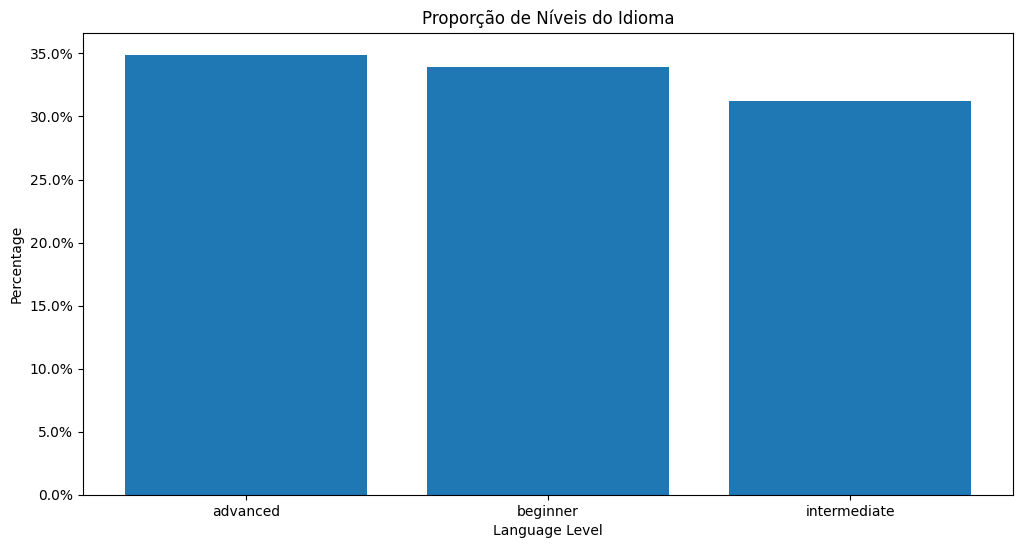

In [13]:
# Proporção dos níveis de fala (language_level)

proportion_language_level = df['language_level'].value_counts(normalize=True) * 100

for status, prop in proportion_language_level.items():
    print(f"{status}: {prop:.2f}%")
    
fig2 = plt.figure(2)
fig2.set_size_inches(12,6)
plt.bar(proportion_language_level.index, proportion_language_level.values)
plt.title('Proporção de Níveis do Idioma')
plt.xlabel('Language Level')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/language_level.png')

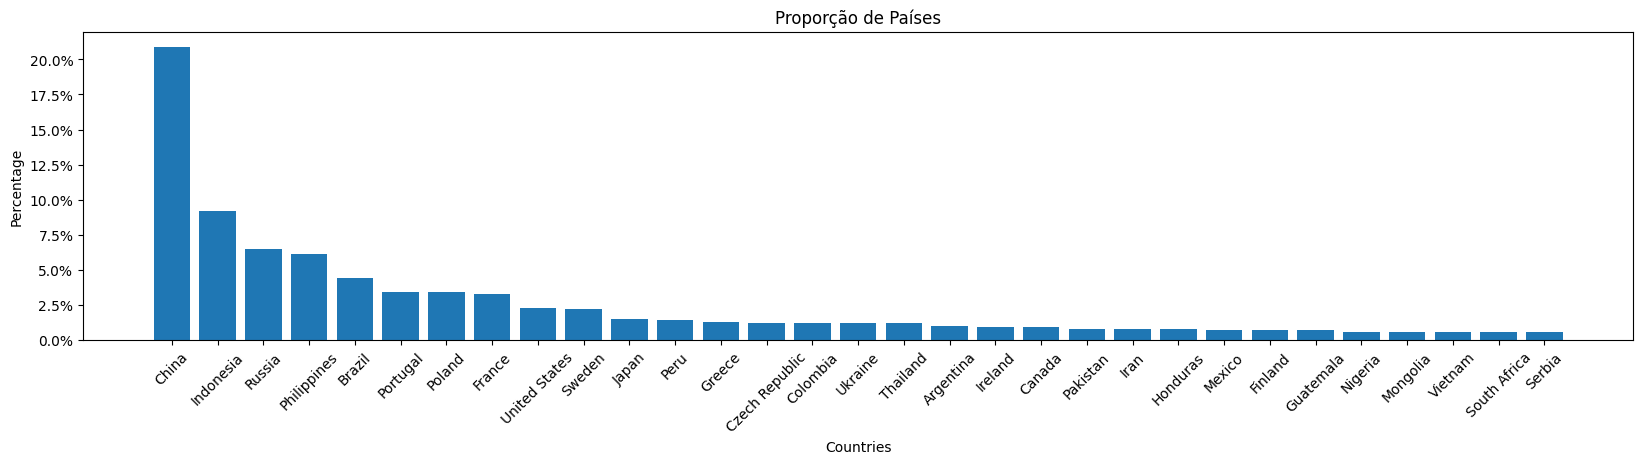

In [14]:
# Proporção de Países

# Contagem e Filtro acima de 5 alunos para o mesmo país
counts = df['country'].value_counts()
counts_filtered = counts[counts > 5]

# Calcula a proporção apenas desses países

proportion_countries = (counts_filtered / counts.sum()) * 100

# Bloco comentado pela quantidade de linhas 
# for status, prop in proportion_countries.items():
#     print(f"{status}: {prop:.2f}%")
    
fig3 = plt.figure(3)
fig3.set_size_inches(20, 4)
plt.bar(proportion_countries.index, proportion_countries.values)
plt.xticks(rotation=45)
plt.title('Proporção de Países')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/countries.png', bbox_inches='tight')

0-20: 5.50%
21-30: 20.90%
31-40: 21.40%
41-50: 23.60%
51-60: 20.30%
61-70: 8.30%


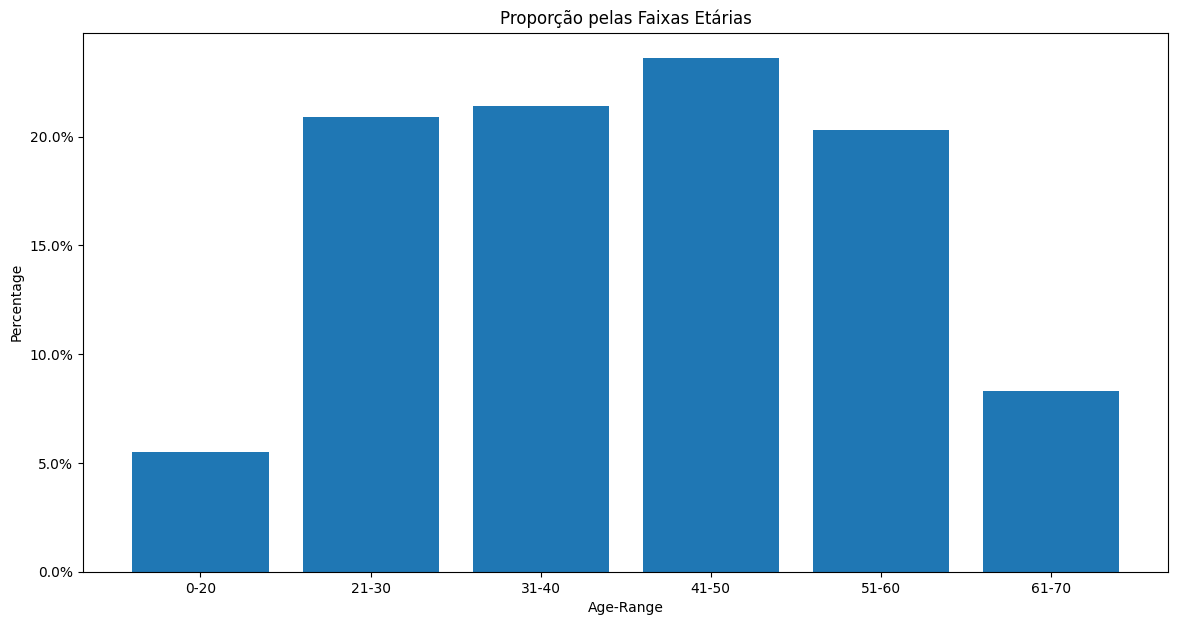

In [15]:
# Proporção dos ranges criados para as idades (age_range)

proportion_age_range = df['age_range'].value_counts(normalize=True) * 100
proportion_age_range = proportion_age_range.reindex(ordem)
for status, prop in proportion_age_range.items():
    print(f"{status}: {prop:.2f}%")
    
fig4 = plt.figure(4)
fig4.set_size_inches(14,7)
plt.bar(proportion_age_range.index, proportion_age_range.values)
plt.title('Proporção pelas Faixas Etárias')
plt.xlabel('Age-Range')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/age_range.png')

<Axes: xlabel='classification', ylabel='count'>

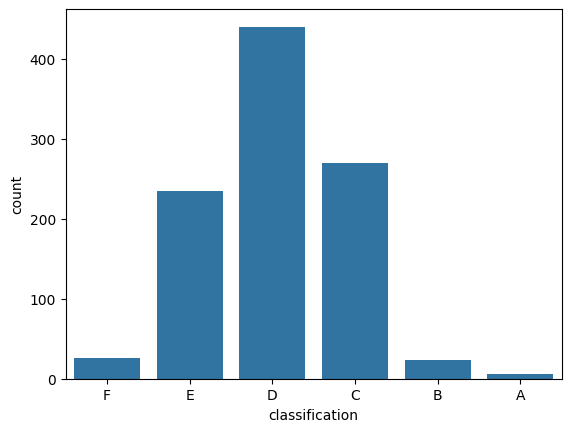

In [16]:
sns.countplot(data=df, x='classification')

# Dados Quantitativos

In [17]:
df[quantitative].describe()

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,41.124000,49.16230,5.006360,5.21550,4.997050,5.072970
std,13.302766,28.95072,2.857734,2.86001,2.895743,1.620140
min,18.000000,0.04000,0.000000,0.01000,0.000000,0.780000
25%,30.000000,23.82250,2.590000,2.68000,2.537500,3.939167
50%,42.000000,48.27000,5.040000,5.37500,5.135000,5.093333
75%,52.000000,73.81000,7.310000,7.66250,7.482500,6.243333
max,64.000000,99.94000,9.990000,9.99000,9.990000,9.556667


In [18]:
# Médias

mean = df[quantitative].mean()
median = df[quantitative].median()
std = df[quantitative].std(ddof=1)

std

age                13.302766
attendance_rate    28.950720
test1_score         2.857734
test2_score         2.860010
test3_score         2.895743
final_grade         1.620140
dtype: float64

## Médias das variáveis quantitativas agrupadas

In [19]:
df_age_range = df.groupby('age_range')[quantitative].mean()
df_age_range

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
age_range,,,,,,
0-20,19.145455,44.037091,4.896727,5.062182,5.633455,5.197455
21-30,25.507177,50.972344,4.910144,5.431818,4.778182,5.040048
31-40,35.242991,48.198037,5.343925,5.148692,4.915607,5.136075
41-50,45.491525,48.801398,4.957331,5.068008,5.433517,5.152952
51-60,55.522167,47.476453,5.074138,5.345222,4.722956,5.047438
61-70,62.542169,55.636265,4.424578,5.046747,4.765783,4.745703


In [20]:
df_level = df.groupby('language_level')[quantitative].mean()
df_level

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
language_level,,,,,,
advanced,40.914040,49.633209,4.980057,5.285673,4.826361,5.030697
beginner,40.663717,46.909941,5.228673,5.189735,5.085516,5.167974
intermediate,41.858974,51.082821,4.794231,5.165000,5.091859,5.017030


In [21]:
df_homework = df.groupby('homework_completion')['final_grade'].mean()
df_homework

homework_completion
completed        5.137733
not completed    5.010498
Name: final_grade, dtype: float64

## Correlação

<Axes: xlabel='attendance_rate', ylabel='final_grade'>

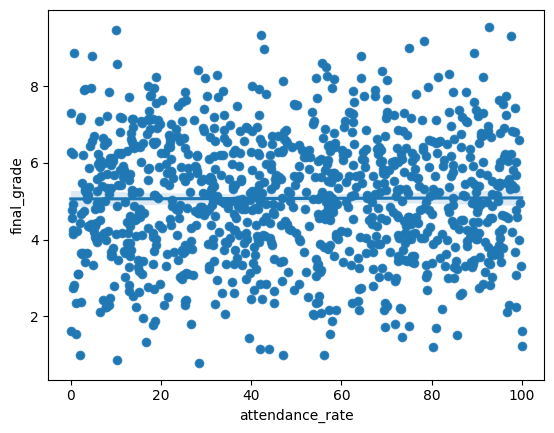

In [29]:
sns.scatterplot(data=df, x='attendance_rate', y='final_grade')
sns.regplot(data=df, x='attendance_rate', y='final_grade')

<Axes: >

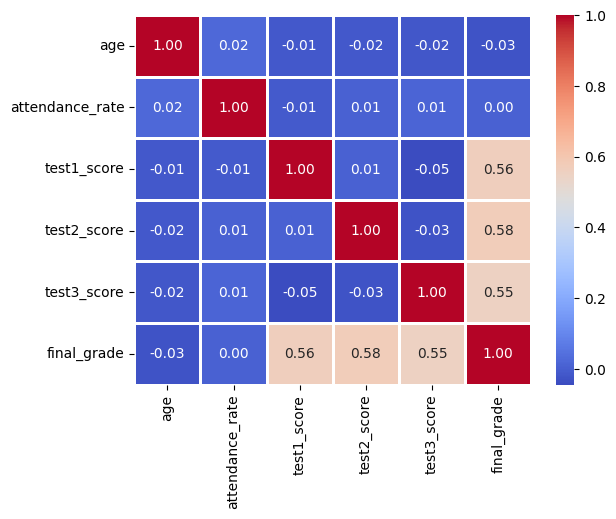

In [ ]:
sns.heatmap(df[quantitative].corr(), annot=True, cmap='coolwarm', linewidths=2, fmt='.2f')

## Identificação de Outliers

Primeiro, vamos configurar a calculadora de outliers a partir de um limite inferior e um limite superior, usando IQR.

In [ ]:
class IQR_Calculator:
    def __init__(self, data):
        self.data = data
        self.q1 = None
        self.q3 = None
        self.iqr = None
        self.sup_limit = None
        self.inf_limit = None
        
    def calculate_quartiles(self):
        self.q1 = self.data.quantile(0.25)
        self.q3 = self.data.quantile(0.75)
        return self.q1, self.q3
    
    def calculate_iqr(self):
        self.iqr = self.q3 - self.q1
        return self.iqr
    
    def calculate_limits(self):
        self.inf_limit = self.q1 - 1.5 * self.iqr
        self.sup_limit = self.q3 + 1.5 * self.iqr
        return self.inf_limit, self.sup_limit
    
    def get_outliers(self):
        if self.inf_limit is None or self.sup_limit is None:
            self.calculate_limits()
        outliers = self.data[(self.data < self.inf_limit) | (self.data > self.sup_limit)]
        return outliers

for col in quantitative:
    print(f"\nColuna: {col}")
    IQR = IQR_Calculator(df[col])
    IQR.calculate_quartiles()
    IQR.calculate_iqr()
    inf, sup = IQR.calculate_limits()
    outliers = IQR.get_outliers()
    print(f"Limite inferior: {inf}")
    print(f"Limite superior: {sup}")
    print(f"Nº de outliers: {len(outliers)}")


Coluna: age
Limite inferior: -3.0
Limite superior: 85.0
Nº de outliers: 0

Coluna: attendance_rate
Limite inferior: -51.158750000000005
Limite superior: 148.79125
Nº de outliers: 0

Coluna: test1_score
Limite inferior: -4.49
Limite superior: 14.39
Nº de outliers: 0

Coluna: test2_score
Limite inferior: -4.793749999999999
Limite superior: 15.13625
Nº de outliers: 0

Coluna: test3_score
Limite inferior: -4.880000000000001
Limite superior: 14.9
Nº de outliers: 0

Coluna: final_grade
Limite inferior: 0.48291666666666666
Limite superior: 9.699583333333333
Nº de outliers: 0


In [ ]:
# Agora, por Z-score

class ZScore_Calculator:
    def __init__(self, data, threshold=3):
        self.data = data
        self.z_scores = None
        self.threshold = threshold
        self.outliers = None

    def calculate_zscores(self):
        self.z_scores = zscore(self.data)
        return self.z_scores

    def get_outliers(self):
        if self.z_scores is None:
            self.calculate_zscores()
        self.outliers = self.data[abs(self.z_scores) > self.threshold]
        return self.outliers

# Facilitar a utilização para o objeto
ZS = ZScore_Calculator(df[col])

print(f"Z-Score threshold: {ZS.threshold}")
for col in quantitative:
    print(f"\nColuna: {col}")
    zscores = ZS.calculate_zscores()
    outliers = ZS.get_outliers()
    print(f"Nº de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f'Outliers: {outliers}')

Z-Score threshold: 3

Coluna: age
Nº de outliers: 0

Coluna: attendance_rate
Nº de outliers: 0

Coluna: test1_score
Nº de outliers: 0

Coluna: test2_score
Nº de outliers: 0

Coluna: test3_score
Nº de outliers: 0

Coluna: final_grade
Nº de outliers: 0
